## LABORATORY 04: MACHINE LEARNING II - CLASSIFICATION PROBLEM

### Case of Study 02: Obesity or CVD risk

Estimation of obesity levels among individuals in Mexico, Peru, and Colombia.
Size: 2,111 records, 17 attributes.
Age Range: 14–61 years. Attributes:
- Eating Habits: High-caloric food consumption (FAVC), vegetable consumption frequency (FCVC), main meals per day (NCP), food between meals (CAEC), daily water intake (CH20), and alcohol consumption (CALC).
- Physical Condition: Calorie monitoring (SCC), physical activity frequency (FAF), time using tech devices (TUE), and transportation type (MTRANS).
- Demographics: Gender, age, height, and weight.
Obesity Levels:
Categories: Underweight, Normal, Overweight, Obesity I, Obesity II, Obesity III (based on BMI ranges).

#### 1. Load the dataset

In [65]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn
import scripts
import warnings
warnings.filterwarnings("ignore")

In [5]:
# load train and test set
dataset = pd.read_csv("data.csv", sep = ",", low_memory = False)
test_set = pd.read_csv("datatest.csv", sep = ",", low_memory = False)
dataset.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
# dimensions of dataset
print("#Train-samples = ", dataset.shape[0])
print("#Train-features = ", dataset.shape[1])
print("#Test-samples = ", test_set.shape[0])
print("#Test-features = ", test_set.shape[1])

#Train-samples =  2111
#Train-features =  17
#Test-samples =  1005
#Test-features =  17


In [11]:
# definition of preprocessor
from scripts.preprocess import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 17 
 Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Numerical features: 
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical features: 
 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


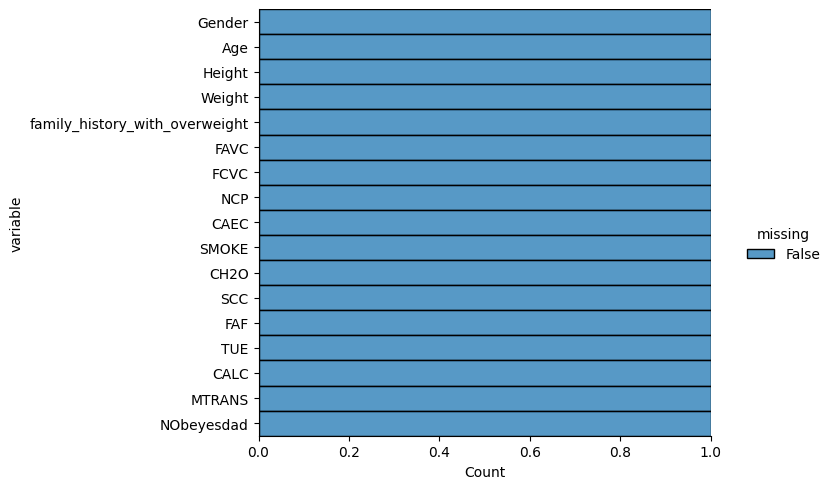

In [8]:
dp.filter_missing(dataset)

#### 2. Exploratory Data Analysis

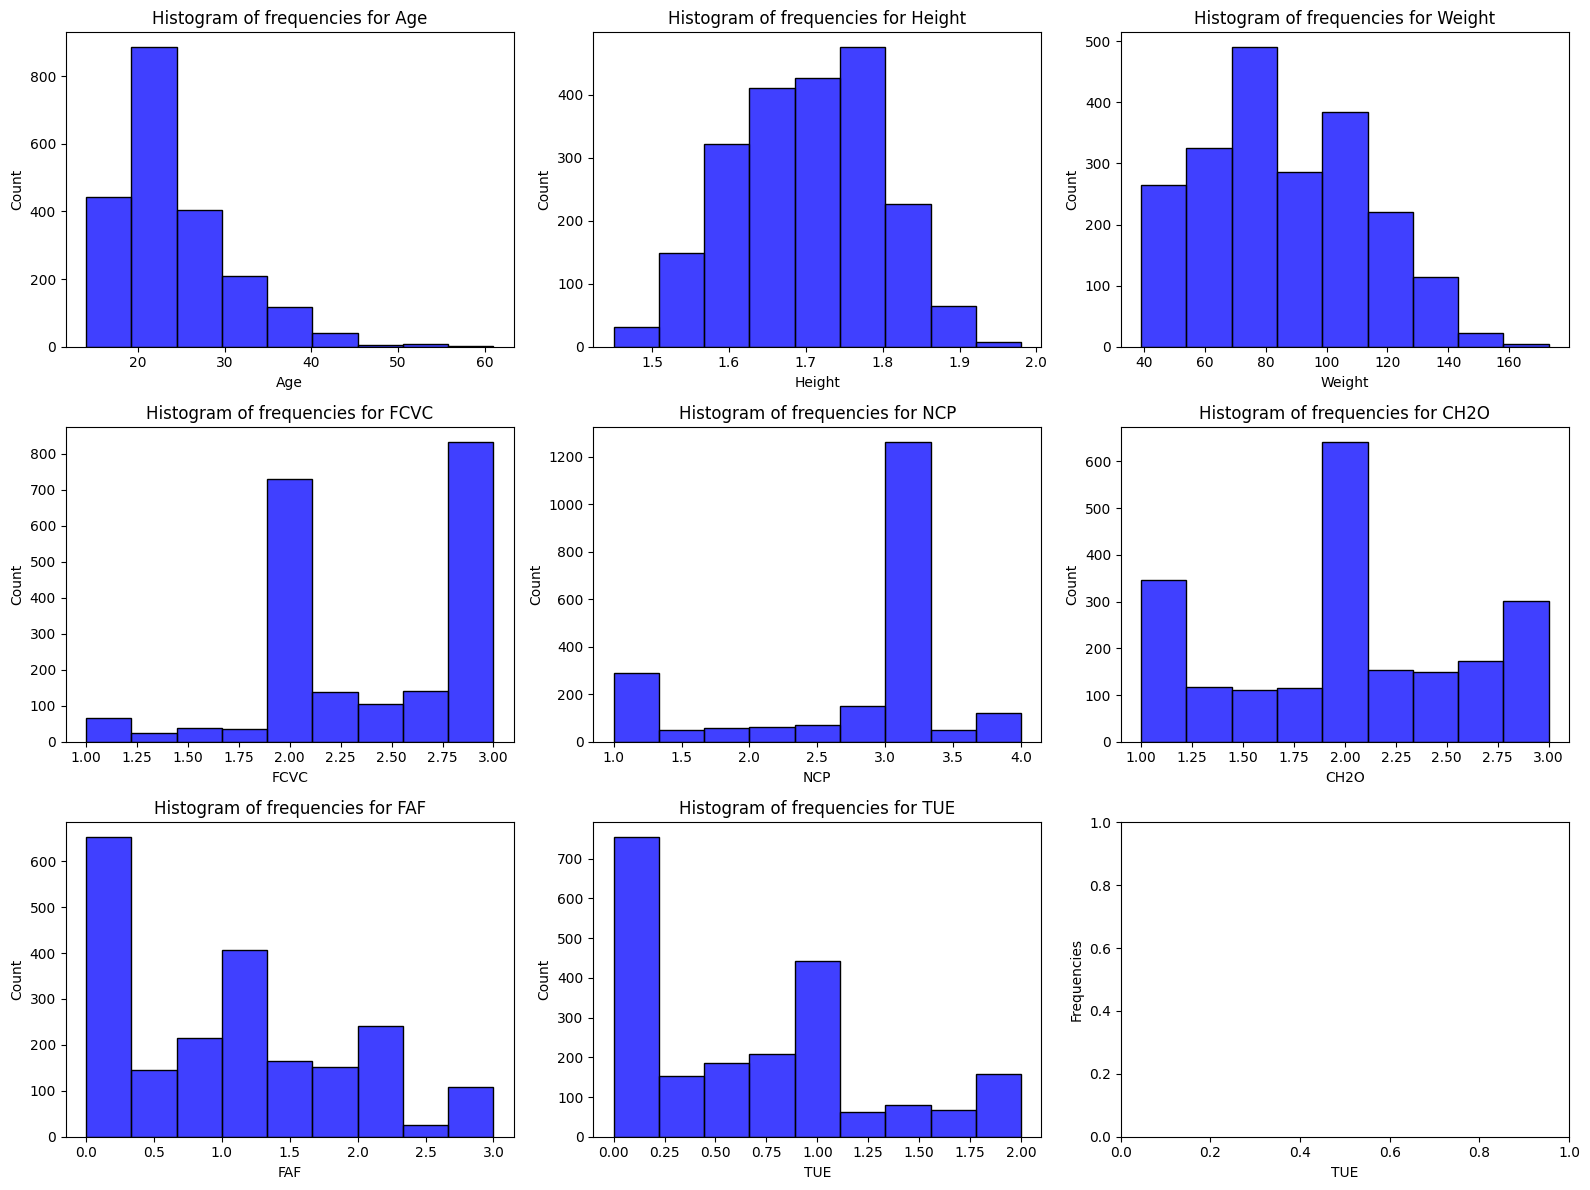

In [14]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(dataset, num_cols, bins = 9)

In [15]:
# check the behavior of categorical features
dp.get_categorical_instances(dataset, cat_cols)


***** Gender ******
Gender
Male      1068
Female    1043
Name: count, dtype: int64

***** family_history_with_overweight ******
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

***** FAVC ******
FAVC
yes    1866
no      245
Name: count, dtype: int64

***** CAEC ******
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

***** SMOKE ******
SMOKE
no     2067
yes      44
Name: count, dtype: int64

***** SCC ******
SCC
no     2015
yes      96
Name: count, dtype: int64

***** CALC ******
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

***** MTRANS ******
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

***** NObeyesdad ******
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II       

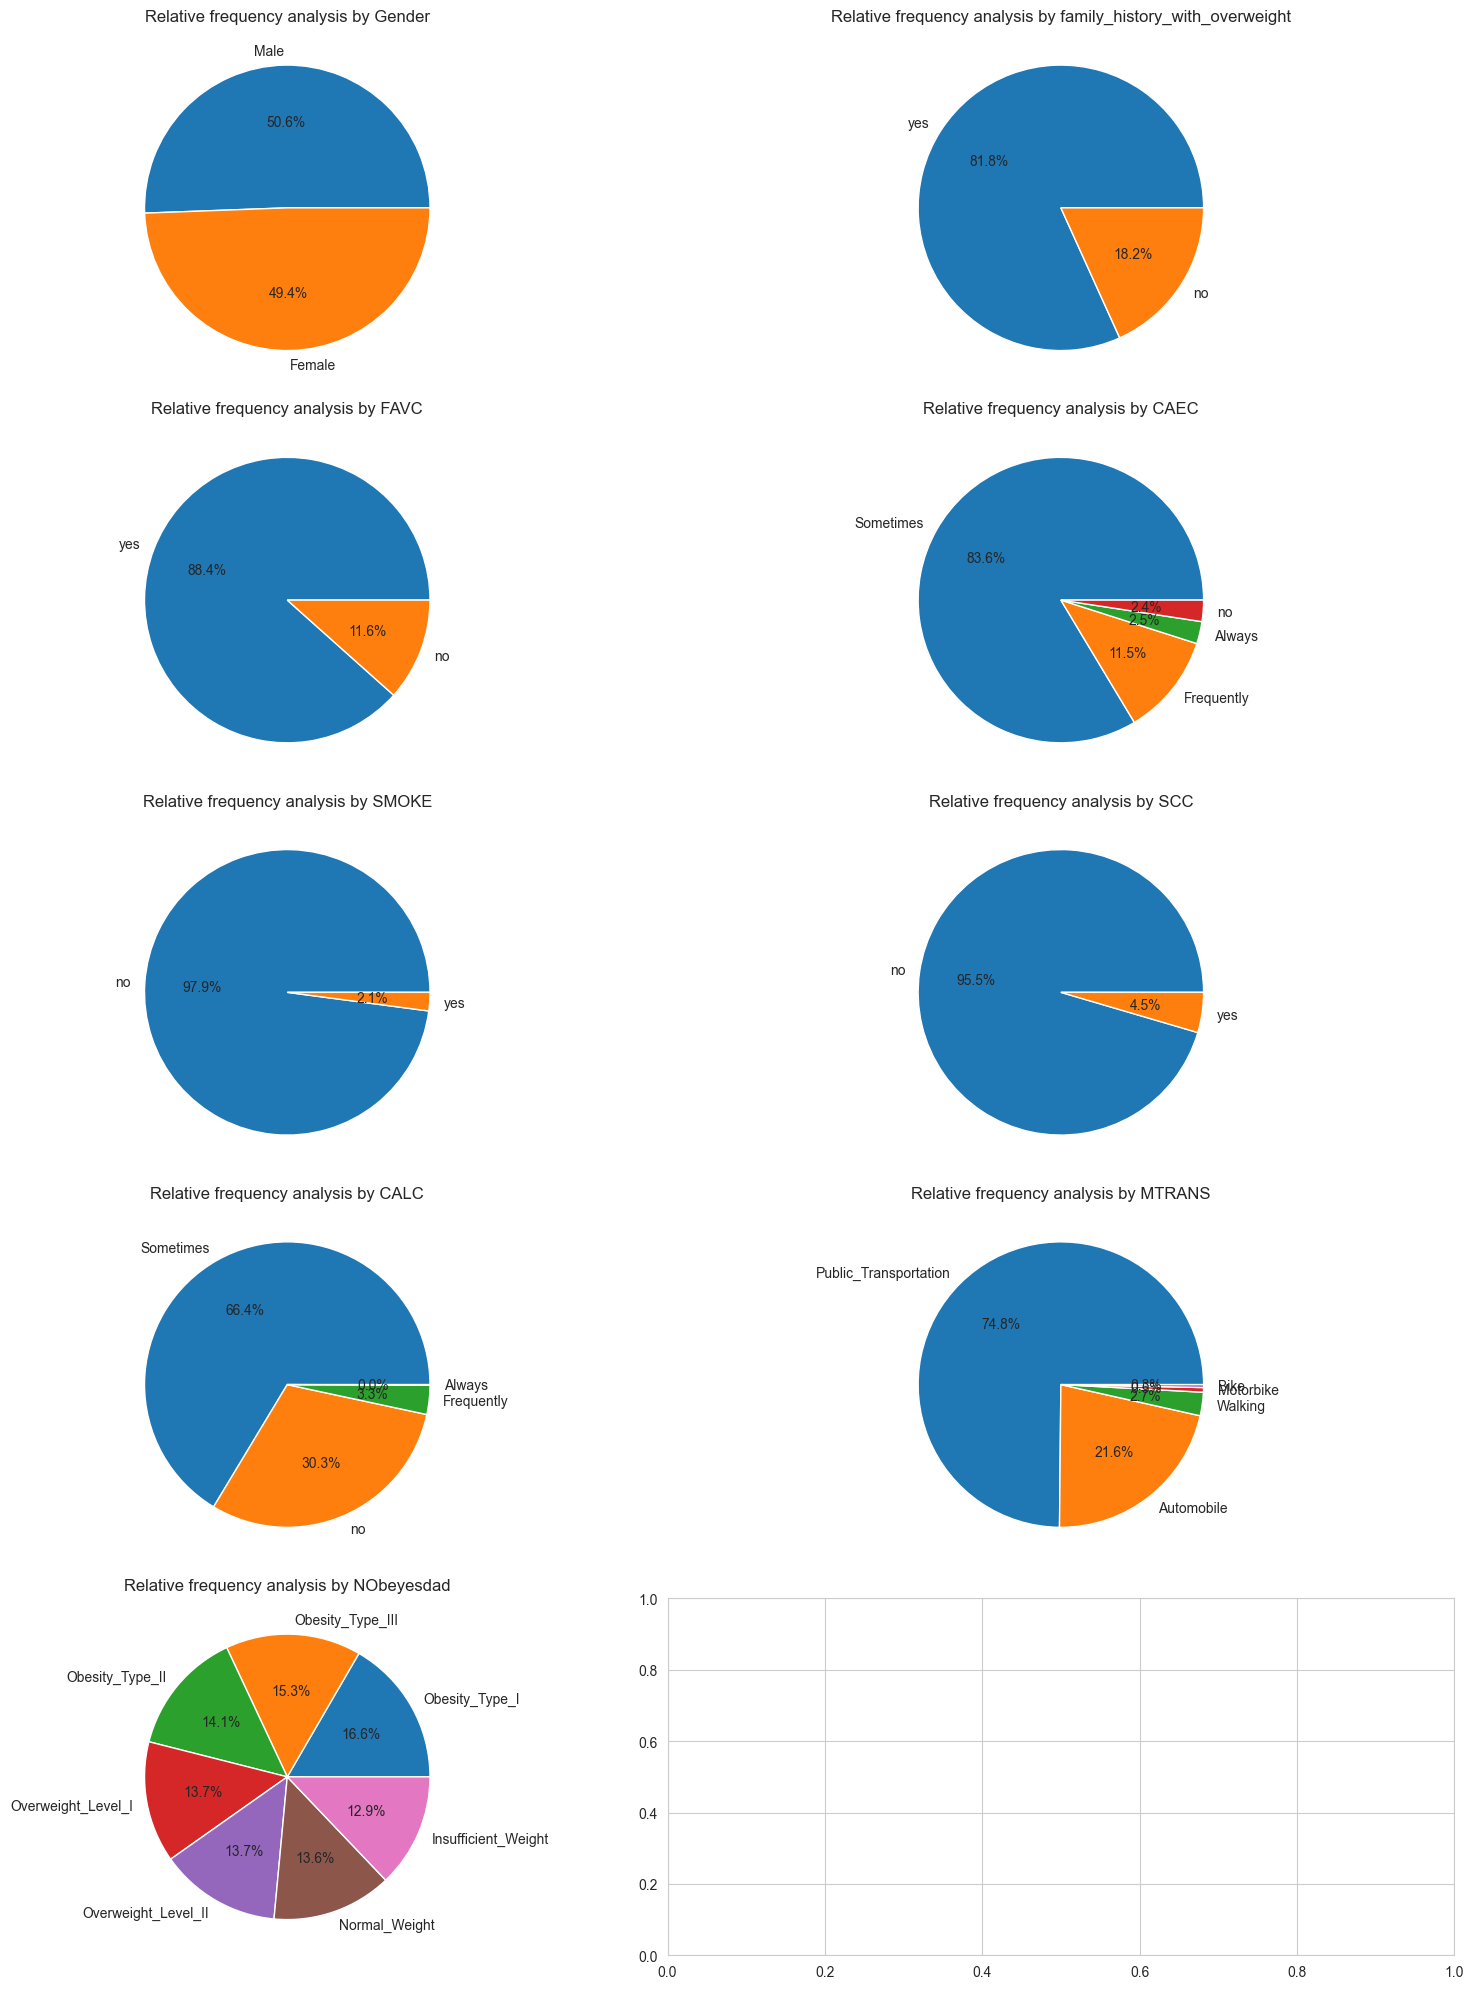

In [66]:
# iteratively pie chart
dp.iter_piechart(dataset, cat_cols)

#### 4. Data preprocessing

In [17]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "NObeyesdad"]
y = dataset["NObeyesdad"]

In [18]:
x.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [19]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (2111, 16)
Dimension of target =  (2111,)


Split train and test set

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (1688, 16)
Y-train:  1688
X-test dim:  (423, 16)
Y-test:  423


In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(), ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]), 
    (OneHotEncoder(handle_unknown="ignore"), ["Gender", "family_history_with_overweight", "FAVC", "CAEC", 
                                              "SMOKE", "SCC", "CALC", "MTRANS"]) 
)

In [25]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'Height', 'Weight', 'FCVC', 'NCP',
                                  'CH2O', 'FAF', 'TUE']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                  'MTRANS'])])

In [26]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [27]:
x_train

array([[ 2.18484615, -1.55781383, -0.28185872, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.53555414,  0.19456719,  0.8562935 , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.42210558, -1.39828869, -0.26557155, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.52745464, -0.89565085, -0.65226847, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.78851581, -0.65602775, -0.65584509, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01307325,  0.7522504 ,  1.16491232, ...,  0.        ,
         1.        ,  0.        ]])

In [28]:
y_train

1295         Obesity_Type_I
1627        Obesity_Type_II
1388         Obesity_Type_I
1318         Obesity_Type_I
648     Insufficient_Weight
               ...         
1033    Overweight_Level_II
1731        Obesity_Type_II
763      Overweight_Level_I
835      Overweight_Level_I
1653        Obesity_Type_II
Name: NObeyesdad, Length: 1688, dtype: object

In [29]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


#### 5. Building Models

Benchmark for Models
* KNN
* SVM
* Random Forest
* XGBoost Classifier
* LightGBM Classifier

In [30]:
%reload_ext autoreload
%autoreload 2

KNN Classifier

In [67]:
from scripts.classifiers import KNNModel
import time

# train model
sttrain_knn = time.time()
knn = KNNModel()
knn_model = knn.train(x_train, y_train)

# calculate time
ettrain_knn = time.time()
ttrain_knn = ettrain_knn - sttrain_knn
print(f"Time of training KNN: {ttrain_knn:.3f} seconds")

Best KNN Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Time of training KNN: 11.046 seconds


In [32]:
knn_model

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [68]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", knn_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", knn_model.predict(x_test[0:10]))

real values in train:  ['Obesity_Type_I' 'Obesity_Type_II' 'Obesity_Type_I' 'Obesity_Type_I'
 'Insufficient_Weight' 'Overweight_Level_I' 'Normal_Weight'
 'Obesity_Type_III' 'Obesity_Type_III' 'Overweight_Level_II']
predicted values in train:  ['Obesity_Type_I' 'Obesity_Type_II' 'Obesity_Type_I' 'Obesity_Type_I'
 'Insufficient_Weight' 'Overweight_Level_I' 'Normal_Weight'
 'Obesity_Type_III' 'Obesity_Type_III' 'Overweight_Level_II']
real values in test:  ['Obesity_Type_II' 'Obesity_Type_I' 'Overweight_Level_I'
 'Obesity_Type_III' 'Obesity_Type_III' 'Obesity_Type_II'
 'Insufficient_Weight' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_II']
predicted values in test:  ['Obesity_Type_II' 'Obesity_Type_I' 'Overweight_Level_I'
 'Obesity_Type_III' 'Obesity_Type_III' 'Obesity_Type_II'
 'Insufficient_Weight' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_II']


In [34]:
# deploy knn model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=knn_model)

In [35]:
# evaluate knn model
from scripts.evaluator import EvalClassifier
rec_knn = DeployClassifier(path = "models").load_model(filename="knn_v1.pkl")
eval_knn = EvalClassifier(model = rec_knn)

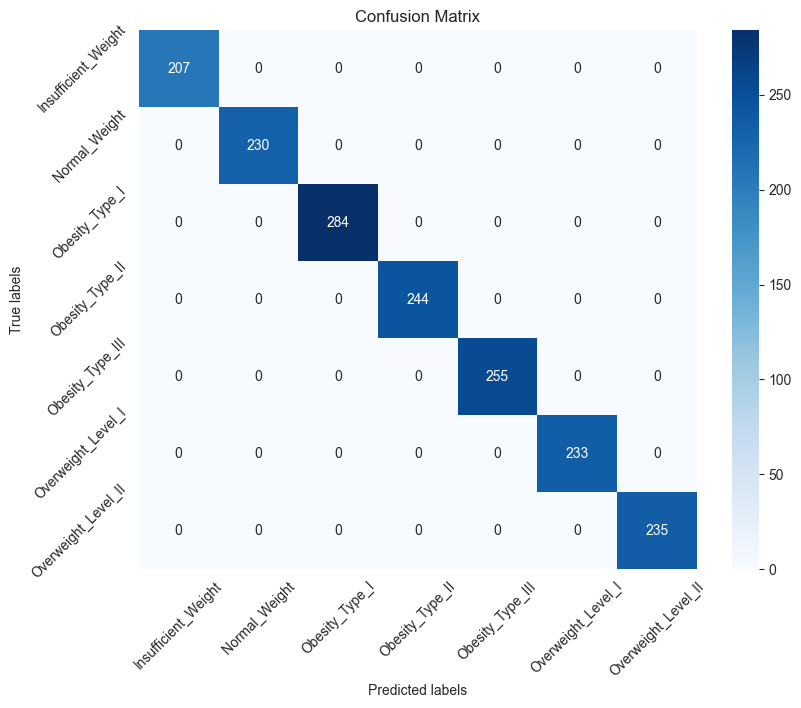

In [36]:
# get confusion matrix in training
y_pred = rec_knn.predict(x_train)
cmknn_train = eval_knn.get_confusion_matrix(y_train.values, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_train, classes)

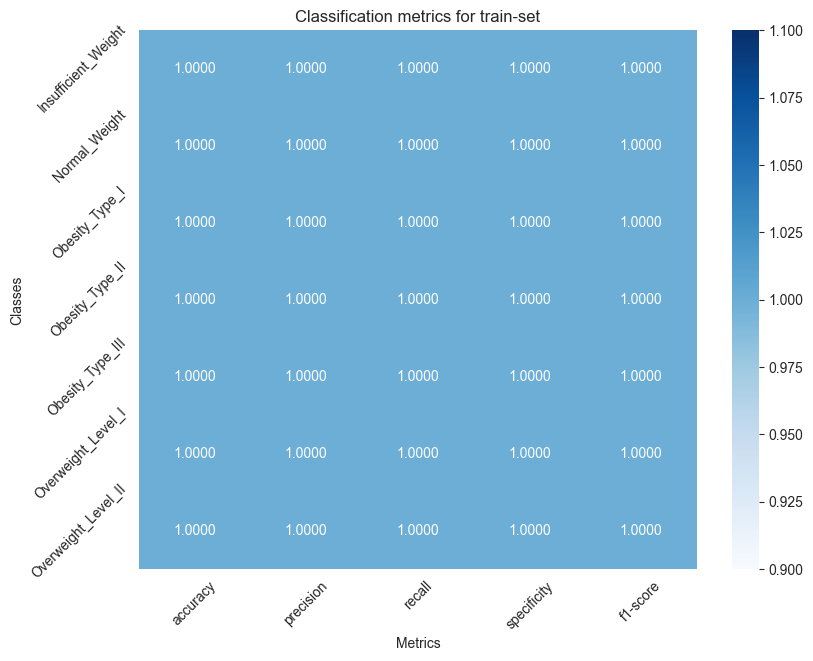

In [37]:
metrics_train_knn = eval_knn.calculate_metrics_by_class(cmknn_train, classes)
eval_knn.plot_metrics_by_class(metrics_train_knn, "Classification metrics for train-set")

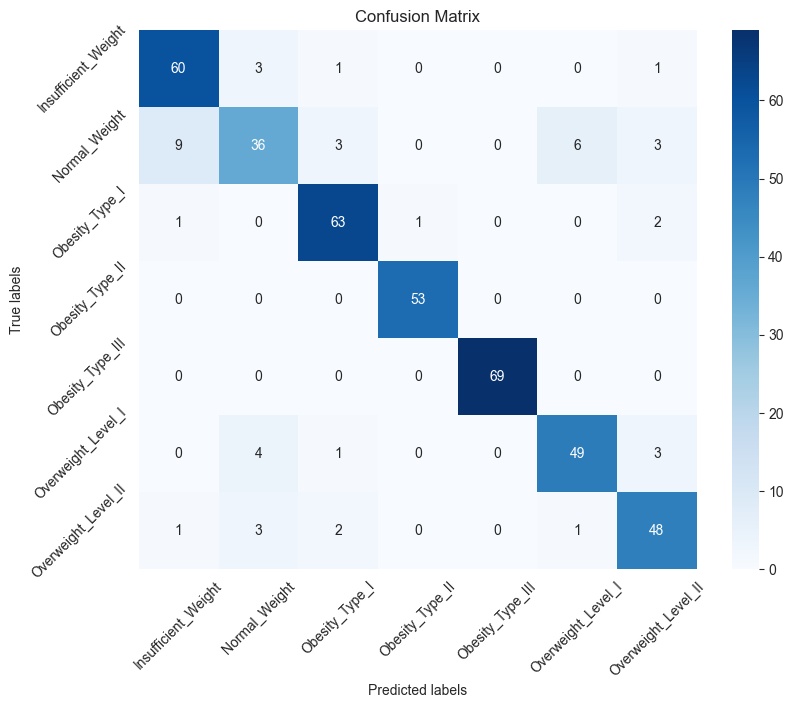

In [38]:
# get confusion matrix in testing
y_pred = rec_knn.predict(x_test)
cmknn_test = eval_knn.get_confusion_matrix(y_test, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_test, classes)

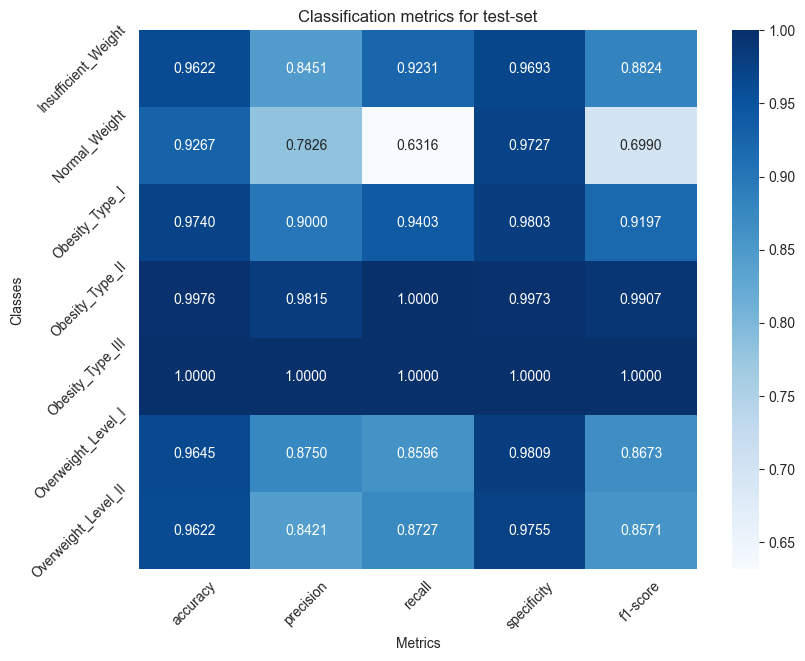

In [39]:
metrics_test_knn = eval_knn.calculate_metrics_by_class(cmknn_test, classes)
eval_knn.plot_metrics_by_class(metrics_test_knn, "Classification metrics for test-set")

In [40]:
# calculate the metrics for whole test set
eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.893617,0.889467,0.889619,0.982286,0.888021


SVM Classifier

In [41]:
from scripts.classifiers import SVMModel
import time

# train model
sttrain_svm = time.time()
svm = SVMModel()
svm_model = svm.train(x_train, y_train)

# calculate time
ettrain_svm = time.time()
ttrain_svm = ettrain_svm - sttrain_svm
print(f"Time of training SVM: {ttrain_svm:.3f} seconds")

Best SVM Parameters: {'C': 10, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Time of training SVM: 6.251 seconds


In [42]:
svm_model

SVC(C=10, class_weight='balanced', degree=2, kernel='linear')

In [43]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", svm_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", svm_model.predict(x_test[0:10]))

real values in train:  ['Obesity_Type_I' 'Obesity_Type_II' 'Obesity_Type_I' 'Obesity_Type_I'
 'Insufficient_Weight' 'Overweight_Level_I' 'Normal_Weight'
 'Obesity_Type_III' 'Obesity_Type_III' 'Overweight_Level_II']
predicted values in train:  ['Obesity_Type_I' 'Obesity_Type_II' 'Obesity_Type_I' 'Obesity_Type_I'
 'Insufficient_Weight' 'Overweight_Level_I' 'Normal_Weight'
 'Obesity_Type_III' 'Obesity_Type_III' 'Overweight_Level_II']
real values in test:  ['Obesity_Type_II' 'Obesity_Type_I' 'Overweight_Level_I'
 'Obesity_Type_III' 'Obesity_Type_III' 'Obesity_Type_II'
 'Insufficient_Weight' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_II']
predicted values in test:  ['Obesity_Type_II' 'Obesity_Type_I' 'Overweight_Level_II'
 'Obesity_Type_III' 'Obesity_Type_III' 'Obesity_Type_II'
 'Insufficient_Weight' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_II']


In [44]:
# deploy svm model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="svm_v1.pkl", model=svm_model)

In [45]:
# evaluate svm model
from scripts.evaluator import EvalClassifier
rec_svm = DeployClassifier(path = "models").load_model(filename="svm_v1.pkl")
eval_svm = EvalClassifier(model = rec_svm)

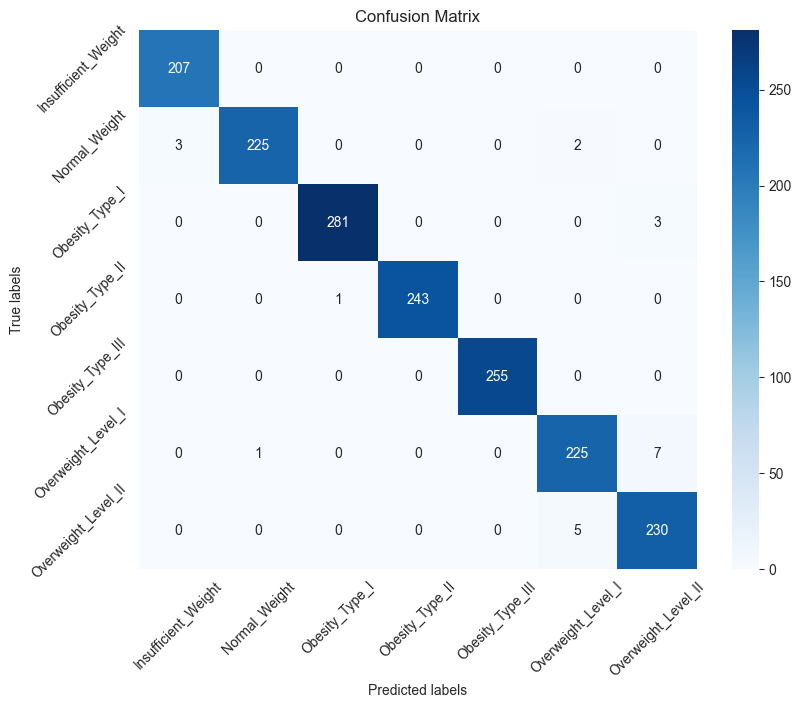

In [46]:
# get confusion matrix in training
y_pred = rec_svm.predict(x_train)
cmsvm_train = eval_svm.get_confusion_matrix(y_train.values, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_train, classes)

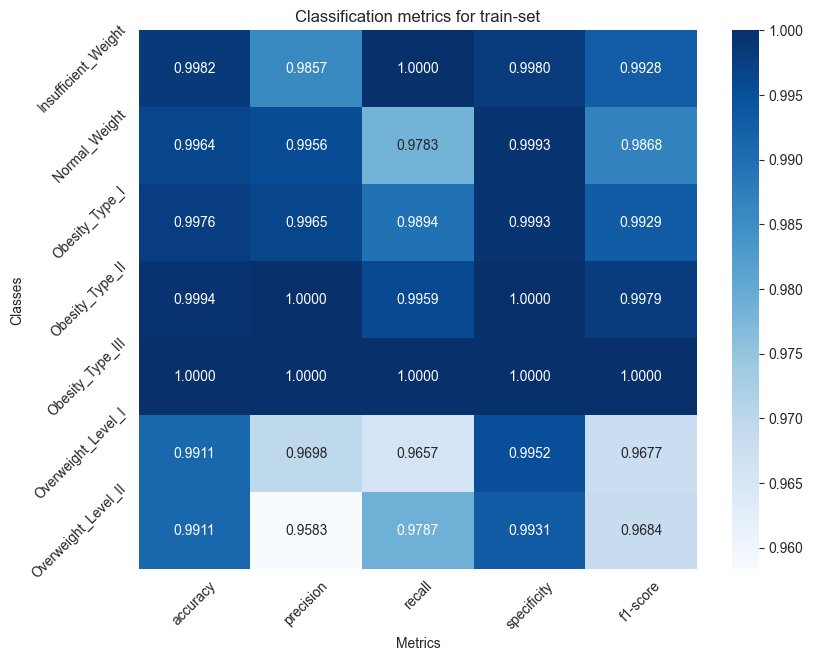

In [47]:
metrics_train_svm = eval_svm.calculate_metrics_by_class(cmsvm_train, classes)
eval_svm.plot_metrics_by_class(metrics_train_svm, "Classification metrics for train-set")

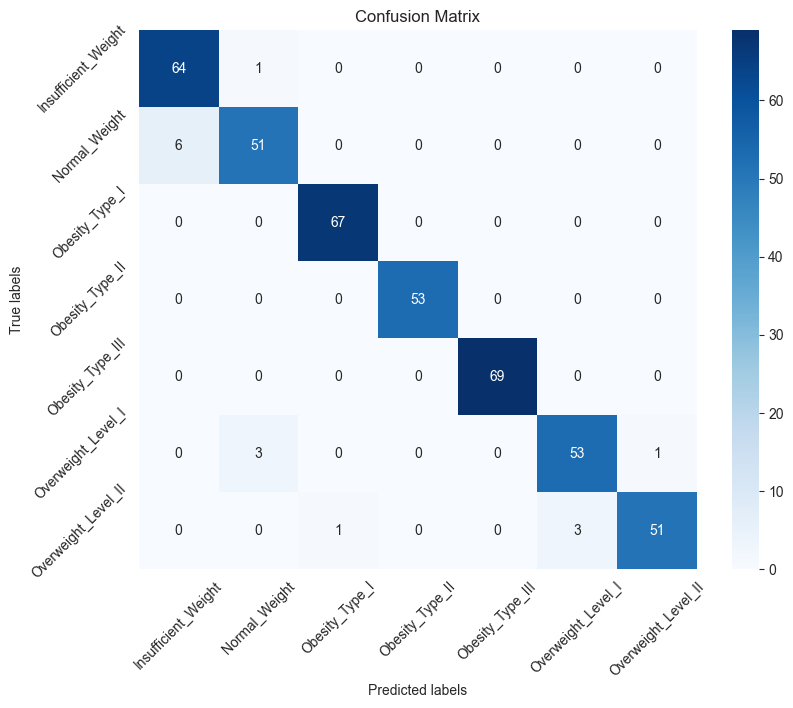

In [49]:
# get confusion matrix in testing
y_pred = rec_svm.predict(x_test)
cmsvm_test = eval_svm.get_confusion_matrix(y_test, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_test, classes)

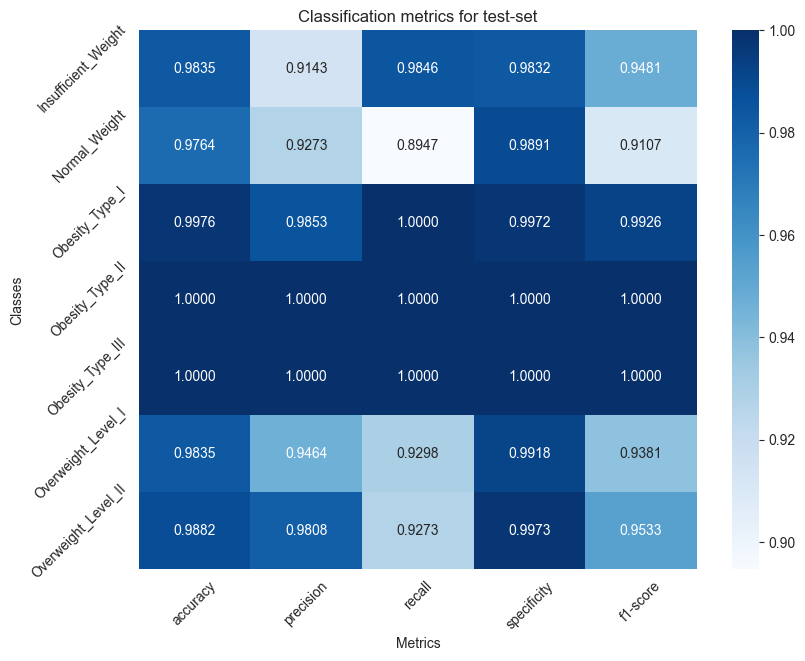

In [50]:
metrics_test_svm = eval_svm.calculate_metrics_by_class(cmsvm_test, classes)
eval_svm.plot_metrics_by_class(metrics_test_svm, "Classification metrics for test-set")

In [51]:
# calculate the metrics for whole test set
eval_svm.calculate_metrics_xall(cmsvm_test, metrics_test_svm)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.964539,0.964864,0.96235,0.994084,0.963254


Random Forest Classifier

In [53]:
from scripts.classifiers import RandomForestModel
import time

# train model
sttrain_rf = time.time()
rf = RandomForestModel()
rf_model = rf.train(x_train, y_train)

# calculate time
ettrain_rf = time.time()
ttrain_rf = ettrain_rf - sttrain_rf
print(f"Time of training Random Forest: {ttrain_rf:.3f} seconds")

Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}
Time of training Random Forest: 9.611 seconds


In [54]:
rf_model

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5, n_estimators=40)

In [55]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", rf_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", rf_model.predict(x_test[0:10]))

real values in train:  ['Obesity_Type_I' 'Obesity_Type_II' 'Obesity_Type_I' 'Obesity_Type_I'
 'Insufficient_Weight' 'Overweight_Level_I' 'Normal_Weight'
 'Obesity_Type_III' 'Obesity_Type_III' 'Overweight_Level_II']
predicted values in train:  ['Obesity_Type_I' 'Obesity_Type_II' 'Obesity_Type_I' 'Obesity_Type_I'
 'Insufficient_Weight' 'Overweight_Level_I' 'Normal_Weight'
 'Obesity_Type_III' 'Obesity_Type_III' 'Overweight_Level_II']
real values in test:  ['Obesity_Type_II' 'Obesity_Type_I' 'Overweight_Level_I'
 'Obesity_Type_III' 'Obesity_Type_III' 'Obesity_Type_II'
 'Insufficient_Weight' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_II']
predicted values in test:  ['Obesity_Type_II' 'Normal_Weight' 'Overweight_Level_I' 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_II' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_I' 'Obesity_Type_II']


In [56]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="rf_v1.pkl", model=rf_model)

In [57]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_rf = DeployClassifier(path = "models").load_model(filename="rf_v1.pkl")
eval_rf = EvalClassifier(model = rec_rf)

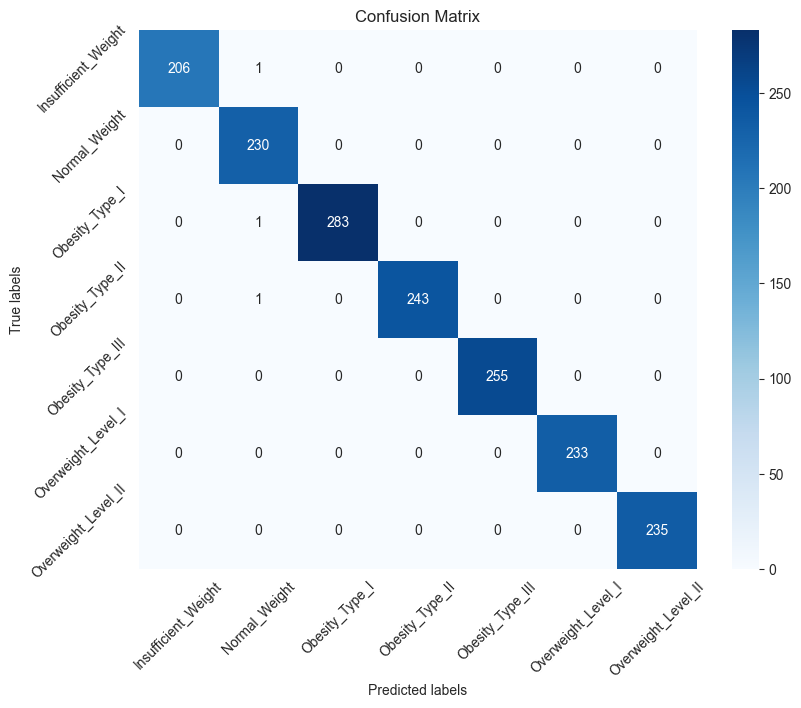

In [58]:
# get confusion matrix in training
y_pred = rec_rf.predict(x_train)
cmrf_train = eval_rf.get_confusion_matrix(y_train.values, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_train, classes)

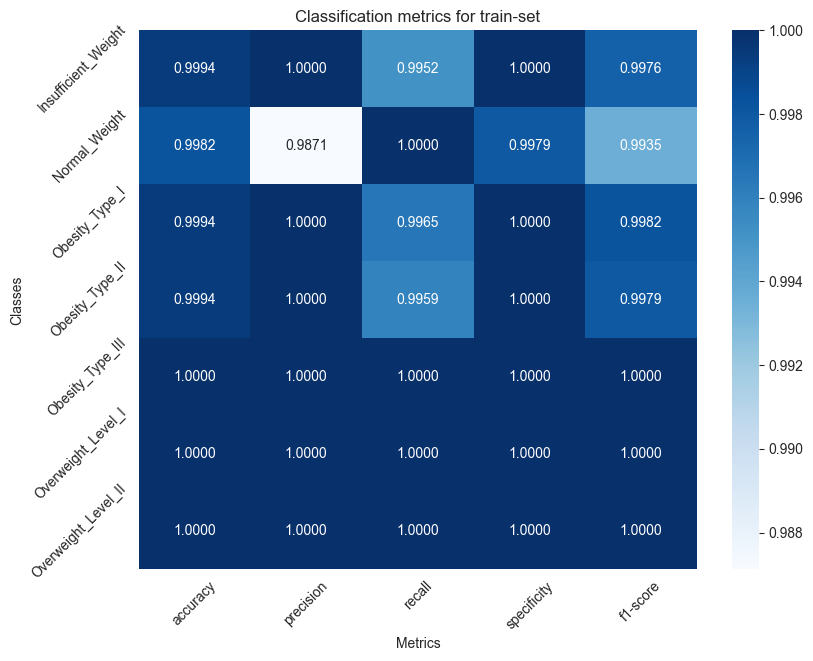

In [59]:
metrics_train_rf = eval_knn.calculate_metrics_by_class(cmrf_train, classes)
eval_rf.plot_metrics_by_class(metrics_train_rf, "Classification metrics for train-set")

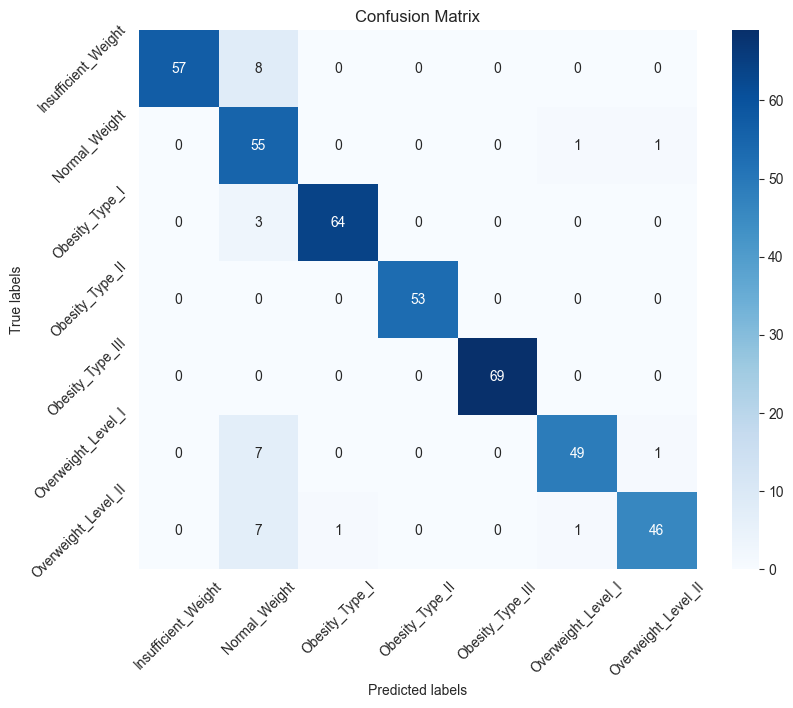

In [60]:
# get confusion matrix in testing
y_pred = rec_rf.predict(x_test)
cmrf_test = eval_rf.get_confusion_matrix(y_test, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_test, classes)

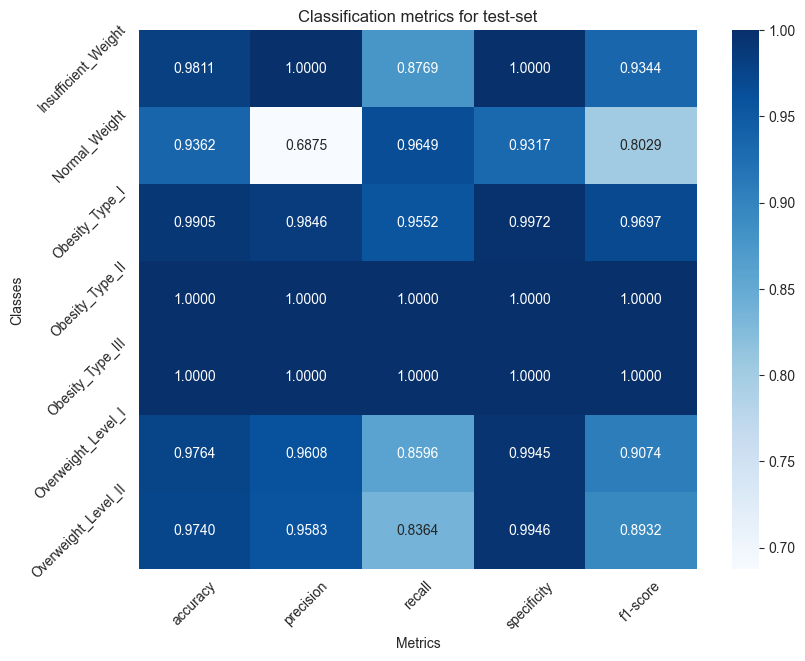

In [61]:
metrics_test_rf = eval_rf.calculate_metrics_by_class(cmrf_test, classes)
eval_rf.plot_metrics_by_class(metrics_test_rf, "Classification metrics for test-set")

In [62]:
# calculate the metrics for whole test set
eval_rf.calculate_metrics_xall(cmrf_test, metrics_test_rf)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.929078,0.941605,0.927582,0.988284,0.929665


Monitoring using Benchmarks

In [64]:
metrics_data = {
    "Algorithm": ["KNN", "SVM", "Random Forest"],
    "Accuracy": [0.893617, 0.964539, 0.929078],
    "Precision": [0.889467, 0.964864,0.941605],
    "Recall": [0.889619, 0.96235, 0.927582	],
    "F1 Score": [0.888021, 0.963254, 0.929665],
    "Specificity": [0.982286, 0.994084, 0.988284]
}
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

       Algorithm  Accuracy  Precision    Recall  F1 Score  Specificity
0            KNN  0.893617   0.889467  0.889619  0.888021     0.982286
1            SVM  0.964539   0.964864  0.962350  0.963254     0.994084
2  Random Forest  0.929078   0.941605  0.927582  0.929665     0.988284
